In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
FILENAME = 'audio/gettysburg.wav'
SAMPLE_RATE = 22050
WINDOW_SIZE = 1024
HOP_SIZE = 256

In [3]:
data, sr = librosa.load(FILENAME, sr=SAMPLE_RATE, duration=10)

In [4]:
data

array([0.00180054, 0.00119019, 0.00048828, ..., 0.00030518, 0.00042725,
       0.00085449], dtype=float32)

In [5]:
data.shape

(220500,)

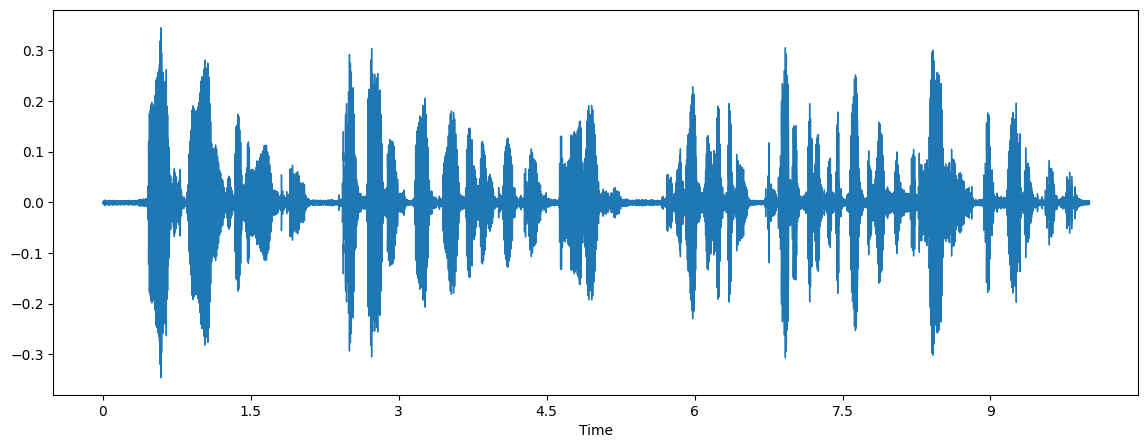

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=SAMPLE_RATE)

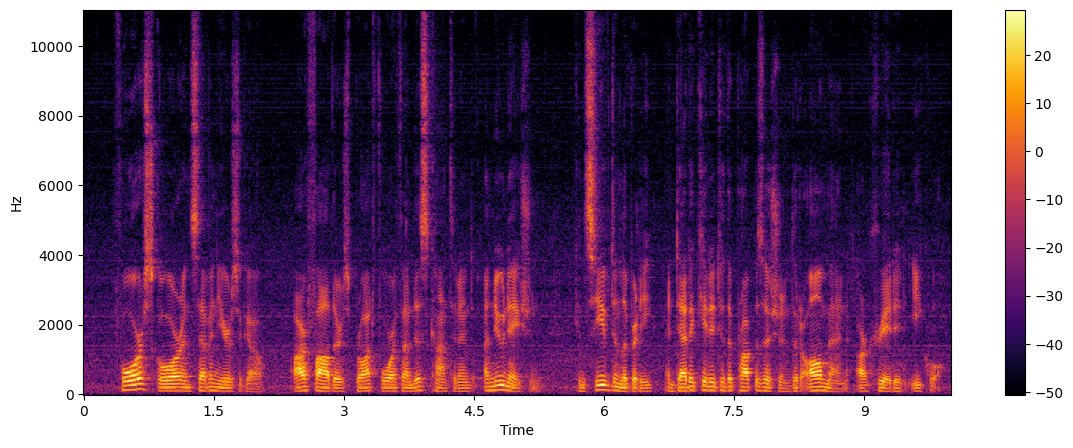

In [9]:
X = librosa.stft(data, n_fft=WINDOW_SIZE, hop_length=HOP_SIZE)
X_magnitude = np.abs(X)
X_db = librosa.amplitude_to_db(X_magnitude)
plt.figure(figsize=(14, 5))
librosa.display.specshow(X_db, sr=SAMPLE_RATE, x_axis='time', y_axis='linear', n_fft=WINDOW_SIZE, hop_length=HOP_SIZE, cmap='inferno')
plt.colorbar()

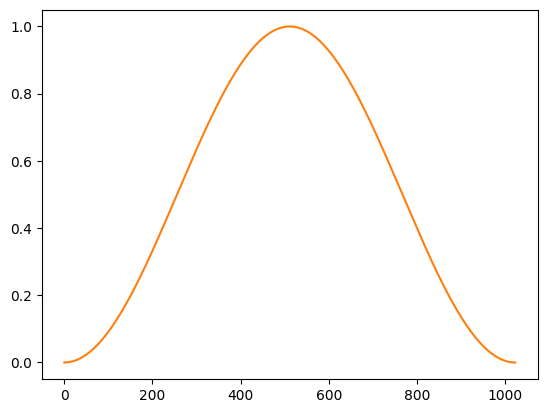

In [12]:
hann = np.hanning(WINDOW_SIZE)
plt.plot(hann, color='C1')

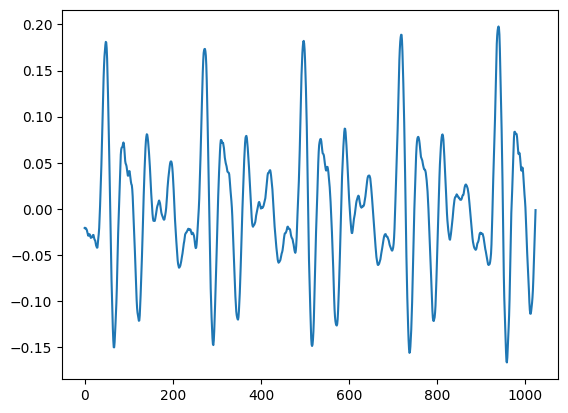

In [11]:
window = data[WINDOW_SIZE*20:WINDOW_SIZE*21]
plt.plot(window)

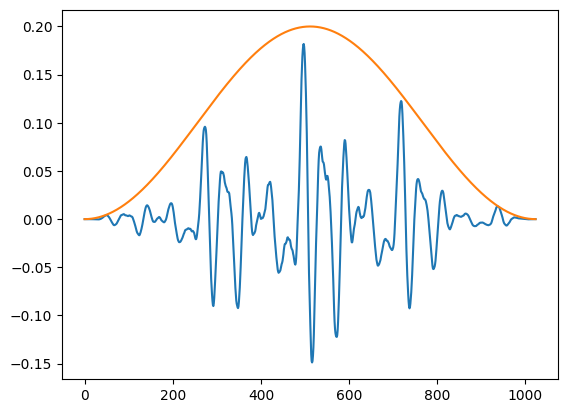

In [15]:
tapered = window * hann
plt.plot(tapered)
plt.plot(hann/5)

In [16]:
import matplotlib
color_map = matplotlib.colormaps.get_cmap('inferno')

In [17]:
def stft_slice(window):
    n = window.shape[0]
    if n < WINDOW_SIZE:
        padded = np.zeros(WINDOW_SIZE, dtype=window.dtype)
        padded[:n] = window
        window = padded
    tapered = window * hann
    return np.fft.rfft(tapered)

In [18]:
def stft_color(slice, min_db=-50, max_db=30):
    slice = np.abs(slice)
    slice = librosa.amplitude_to_db(slice)
    slice = slice.clip(min_db, max_db)
    slice = (slice - min_db) / (max_db - min_db)
    slice = color_map(slice)
    slice = (slice * 255).astype('u1')
    slice = slice[:, :3]
    return slice

In [24]:
h, w = X_db.shape

Y = np.zeros((h, w, 3), dtype='u1')

for i in range(w):
    a = i * HOP_SIZE
    b = i * HOP_SIZE + WINDOW_SIZE
    window = data[a:b]
    slice = stft_slice(window)
    color = stft_color(slice)[::-1]
    Y[:, i] = color

In [25]:
Y.shape

(513, 862, 3)

In [26]:
from PIL import Image

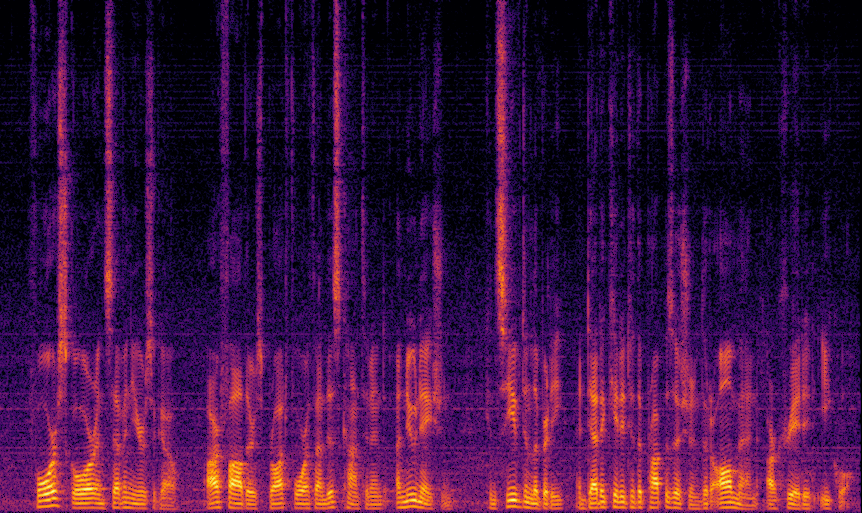

In [27]:
Image.fromarray(Y)

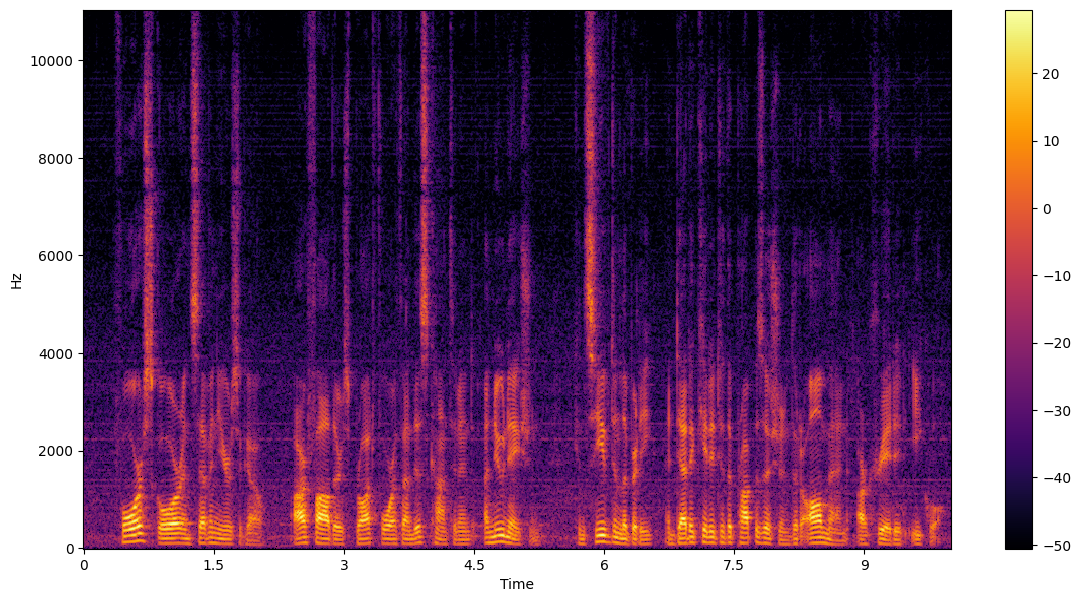

In [23]:
plt.figure(figsize=(14, 7))
librosa.display.specshow(X_db, sr=SAMPLE_RATE, x_axis='time', y_axis='linear', n_fft=WINDOW_SIZE, hop_length=HOP_SIZE, cmap='inferno')
plt.colorbar()